In [72]:
import numpy as np
import matplotlib.pyplot as pl


In [73]:
NGC = np.loadtxt('NGC2516.txt').T

In [125]:

V = NGC[7] #V
BV = NGC[9] # B-V
EBV = 0.112 #E(B-V)
FeH = -0.10 #metalicity

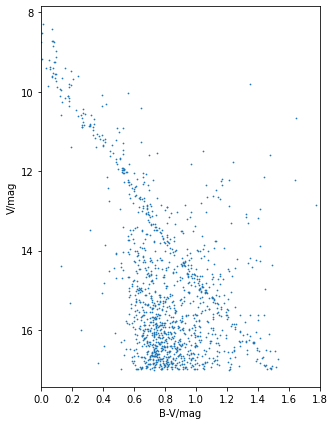

In [127]:
fig = pl.figure()
fig.set_figheight(7)
fig.set_figwidth(5)
pl.scatter(BV ,V , s =0.5)
pl.xlabel('B-V/mag')
pl.ylabel('V/mag')

pl.gca().invert_yaxis()
pl.xlim(np.min(BV),1.8)
pl.savefig('ccd_2516.jpeg')
pl.show()
